<a href="https://colab.research.google.com/github/italolima04/data-science/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

**Casos de COVID-19 no Mundo**


In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cases = pd.read_csv(url)

In [3]:
cases.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1


In [4]:
cases.shape

(264, 89)

In [5]:
#Função que filtra as colunas que quero analisar (retirando as 4 primeiras, pois inicialmente não há interesse na distinção do local)
cases = np.sum(cases.iloc[ : , 4: cases.shape[1]])
cases.index = pd.DatetimeIndex(cases.index)
cases.tail(10)

2020-04-06    1321481
2020-04-07    1395194
2020-04-08    1480202
2020-04-09    1563935
2020-04-10    1657526
2020-04-11    1735650
2020-04-12    1834721
2020-04-13    1904838
2020-04-14    1976191
2020-04-15    2056054
dtype: int64

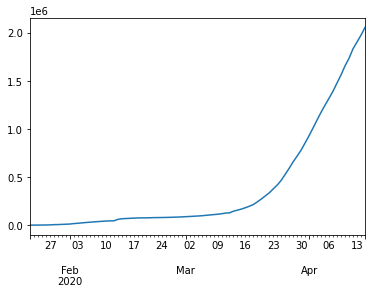

In [6]:
cases.plot()

Gráfico mostra comportamento *exponencial* do contágio.


**Mortes por COVID-19 no Mundo**




In [0]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [8]:
deaths.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
deaths.shape

(264, 89)

In [10]:
deaths = np.sum(deaths.iloc[ : , 4: deaths.shape[1]])
deaths.index = pd.DatetimeIndex(deaths.index)
deaths.tail(10)

2020-04-06     74565
2020-04-07     81865
2020-04-08     88338
2020-04-09     95455
2020-04-10    102525
2020-04-11    108503
2020-04-12    114091
2020-04-13    119482
2020-04-14    125984
2020-04-15    134177
dtype: int64

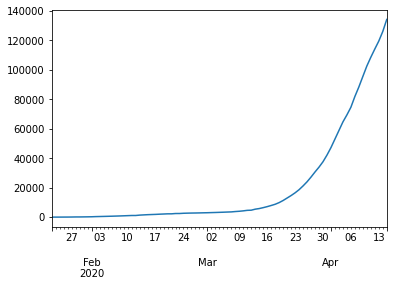

In [11]:
deaths.plot()

In [0]:
#Calcular a mortalidade: mortes/número de casos confirmados
death_rate = (deaths/cases) * 100 

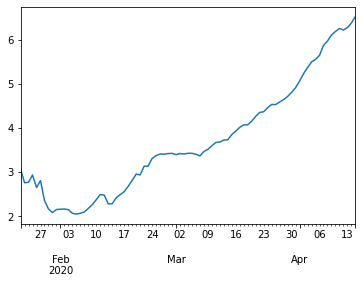

In [23]:
death_rate.plot()

**Recuperados de COVID-19 no Mundo**


In [0]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [13]:
recovered.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
recovered.shape

(250, 89)

In [15]:
#Método que "filtra" o Data Frame, informando que os dados utilizados serão apenas a partir da 4º coluna.
recovered = np.sum(recovered.iloc[ :, 4: recovered.shape[1]])
#Utilizando método do Pandas para pegar o formato de data e atribuir como index
recovered.index = pd.DatetimeIndex(recovered.index)
recovered.tail()

2020-04-11    402110
2020-04-12    421722
2020-04-13    448655
2020-04-14    474261
2020-04-15    511019
dtype: int64

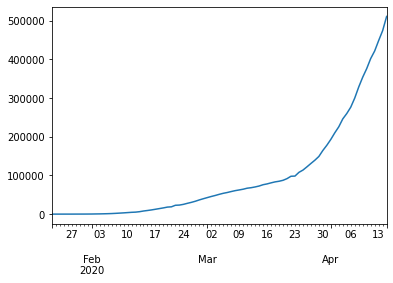

In [16]:
recovered.plot()

In [0]:
#Taxa de pessoas recuperadas: número de pessoas recuperadas / total
recovered_rate = (recovered/cases) * 100

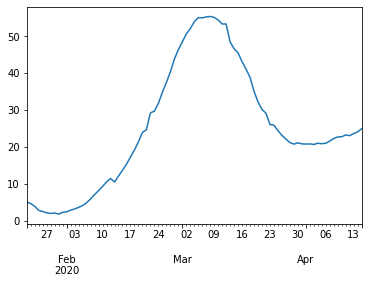

In [25]:
recovered_rate.plot()

**Gráficos, em ordem de: Casos, Mortes, Recuperados:**

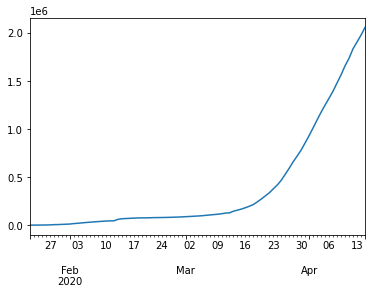

In [17]:
cases.plot()

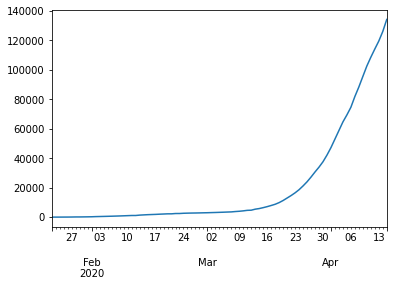

In [18]:
deaths.plot()

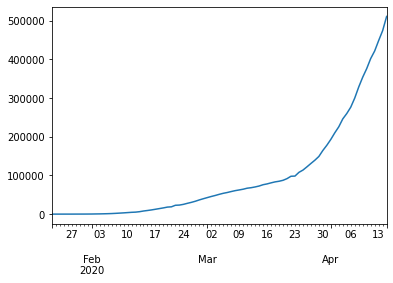

In [19]:
recovered.plot()

**Casos Fechados**

In [27]:
closed_cases = (recovered + deaths)
closed_cases

2020-01-22        45
2020-01-23        48
2020-01-24        62
2020-01-25        81
2020-01-26       108
               ...  
2020-04-11    510613
2020-04-12    535813
2020-04-13    568137
2020-04-14    600245
2020-04-15    645196
Length: 85, dtype: int64

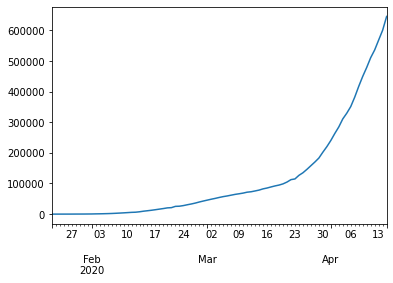

In [35]:
closed_cases.plot()

**Casos Abertos**

In [47]:
open_cases = ((cases - closed_cases))
open_cases

2020-01-22        510
2020-01-23        606
2020-01-24        879
2020-01-25       1353
2020-01-26       2010
               ...   
2020-04-11    1225037
2020-04-12    1298908
2020-04-13    1336701
2020-04-14    1375946
2020-04-15    1410858
Length: 85, dtype: int64

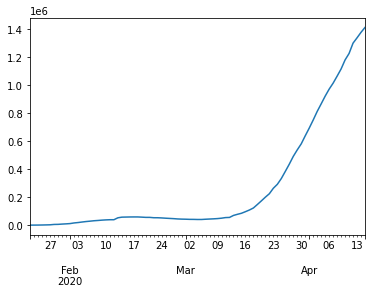

In [48]:
open_cases.plot()

Conferindo se todos os dados estão completos (Mesmo número de Colunas)

In [39]:
cases.shape

(85,)

In [36]:
deaths.shape

(85,)

In [40]:
recovered.shape

(85,)

**Construindo Data Frame concatenando os 3 tipos de dados (Casos, casos abertos e casos fechados)**

In [0]:
#Método do Pandas para concatenar dados
data = pd.concat([cases, open_cases, closed_cases], ignore_index=True, axis=1)

In [50]:
#Renomeando Colunas
data.columns = ['Casos', 'Casos Abertos', 'Casos Fechados']
data 

,Casos,Casos Abertos,Casos Fechados
2020-01-22,555,510,45
2020-01-23,654,606,48
2020-01-24,941,879,62
2020-01-25,1434,1353,81
2020-01-26,2118,2010,108
...,...,...,...
2020-04-11,1735650,1225037,510613
2020-04-12,1834721,1298908,535813
2020-04-13,1904838,1336701,568137
2020-04-14,1976191,1375946,600245


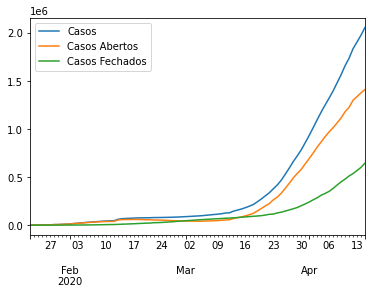

In [51]:
data.plot()

**Construindo Data Frame concatenando os 3 tipos de dados (Casos, Recuperados e Mortes)**

In [0]:
data_CRD = pd.concat([cases, recovered, deaths], ignore_index=True, axis=1)

In [57]:
data_CRD.columns = ['Confirmados', 'Recuperados', 'Mortes']
data_CRD

,Confirmados,Recuperados,Mortes
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-04-11,1735650,402110,108503
2020-04-12,1834721,421722,114091
2020-04-13,1904838,448655,119482
2020-04-14,1976191,474261,125984


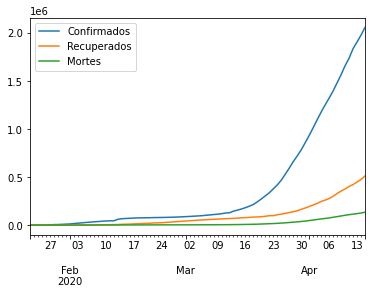

In [58]:
data_CRD.plot()